In [170]:
import cartopy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xarray as xr
import cartopy.crs as ccrs


In [171]:
%matplotlib inline

In [172]:
np.__version__, xr.__version__, cartopy.__version__

('1.14.2', '0.12.1', '0.16.0')

### Minimum example

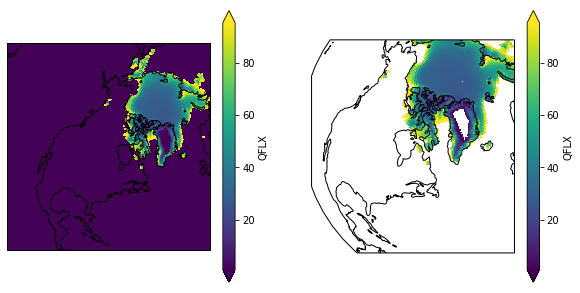

In [173]:
da2 = xr.open_dataarray('tmp.nc') # evaporative flux
da2 = da2.drop(('lat2d', 'lon2d'))

# Mask values above 100 and below 0 (arbitrary)
data2 = da2
data2 = xr.where(data2>100, np.NaN, data2)
data2 = xr.where(data2<0, np.NaN, data2) 

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(1,2,figure=fig)
lon = data.lon
lat = data.lat
lon2d, lat2d = np.meshgrid(lon,lat)


proj_stereo = ccrs.Stereographic(central_longitude=320, central_latitude=72) 
proj_ortho = ccrs.Orthographic(central_longitude=320, central_latitude=72) 

ax1 = fig.add_subplot(gs[0,0], projection=proj_stereo)
ax2 = fig.add_subplot(gs[0,1], projection=proj_ortho)

extent = [200, 340, 20, 84]

for ax in (ax1,ax2):

    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()

    # Xarray plotting syntax
    data2.plot(ax=ax, transform=ccrs.PlateCarree(), robust=True)

    # Matplotlib plotting syntax
    #cn = ax.pcolormesh(lon2d, lat2d, data.to_masked_array(), transform=ccrs.PlateCarree())
    #plt.colorbar(cn)
fig.savefig('minimum_example.png')

## More code to illustrate that the bug does not always occur

### Dataset 1: tutorial air temperature

In [174]:
with xr.tutorial.load_dataset('air_temperature') as ds:

    da = ds.air[0]

    # Mask some random pixels in the dataset
    #da[10:15,10:15] = np.NaN

data1 = xr.where(da > 280, np.NaN, da)

/Users/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: load_dataset` will be removed in a future version of xarray. The current behavior of this function can be achived by using `tutorial.open_dataset(...).load()`.
  if __name__ == '__main__':


### Dataset 2: output from global climate model

In [175]:
da2 = xr.open_dataarray('tmp.nc') # evaporative flux
da2 = da2.drop(('lat2d', 'lon2d'))

# Mask values above 100 and below 0 (arbitrary)
data2 = da2
data2 = xr.where(data2>100, np.NaN, data2)
data2 = xr.where(data2<0, np.NaN, data2) 

In [176]:
def make_figure(data, stereo=True):
    """
    da: Xarray dataArray
    stereo: True = Stereographic, False = Orthographic
    """
    fig = plt.figure()
    
    lon = data.lon
    lat = data.lat
    lon2d, lat2d = np.meshgrid(lon,lat)

    if (stereo): 
        myproj3 = ccrs.Stereographic(central_longitude=320, central_latitude=72) 
    else:
        myproj3 = ccrs.Orthographic(central_longitude=320, central_latitude=72) 
        
    ax = plt.axes(projection=myproj3)

    extent = [200, 340, 20, 84]

    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines()

    # Xarray plotting syntax
    #data.plot(ax=ax, transform=ccrs.PlateCarree(), robust=True)

    # Matplotlib plotting syntax
    cn = ax.pcolormesh(lon2d, lat2d, data.to_masked_array(), transform=ccrs.PlateCarree())
    plt.colorbar(cn)

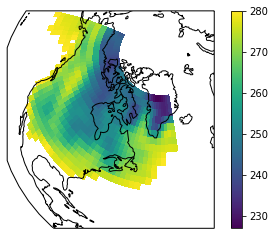

In [177]:
# Good : dataset 1, Orthographic
make_figure(data1, False)

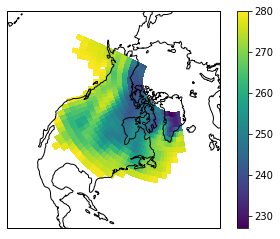

In [178]:
# Good : dataset 1, Stereographic
make_figure(data1, True)

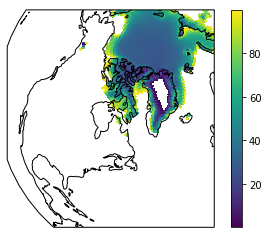

In [179]:
# Good: dataset 2, Orthographic
make_figure(data2, False)

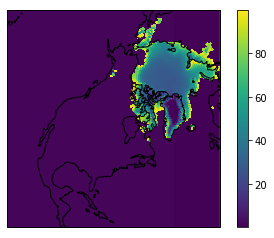

In [180]:
# Bad : dataset 2, Stereographic
# Problem: missing values (NaN) are shown as low values instead of white
make_figure(data2, True)